# Exercício 12: Análise de Satisfação de Bancos
Imagine que você foi contratado por uma instituição financeira de grande porte para analisar a satisfação dos clientes com os serviços prestados pela empresa. Como analistas de dados, sua missão é coletar, processar e analisar um grande volume de dados para obter insights valiosos sobre o que os clientes pensam sobre a empresa, suas necessidades e expectativas.
Para começar, vamos coletar dados de diversas fontes, como pesquisas de satisfação, registros de atendimento ao cliente, feedbacks nas redes sociais e reclamações registradas em plataformas de avaliação de empresas. Com esses dados em mãos, podemos criar um banco de dados robusto e padronizado para análise.

In [2]:
#Importação das Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapear o caminho do arquivo e nome
caminhoCompleto = "C:\\Users\\FIC\\Documents\\Carlos Zanelato_Python\\Arquivos\\dados-satisfação.xlsx"

# Alocar as informações em um Dataframe
dados = pd.read_excel(caminhoCompleto, sheet_name='treino')

# Exibir o cabeçalho do Dataframe
dados.head()


,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
1,Banco do Brasil,excelente,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
2,Banco do Brasil,Bom,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
3,Banco do Brasil,aplicativo muito top,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
4,Banco do Brasil,Fácil e prático,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO


In [4]:
# Substituindo os dados
dados['Elogio a Instituição'] = dados['Elogio a Instituição'].replace('SIM',1)
dados['Elogio a Instituição'] = dados['Elogio a Instituição'].replace('NÃO',0)

dados['Elogio quanto ao app'] = dados['Elogio quanto ao app'].replace('SIM',1)
dados['Elogio quanto ao app'] = dados['Elogio quanto ao app'].replace('NÃO',0)
dados['Elogio quanto ao app'] = dados['Elogio quanto ao app'].replace('NAO',0)

dados['Reclamação quanto ao app'] = dados['Reclamação quanto ao app'].replace('NÃO',0)
dados['Reclamação quanto ao app'] = dados['Reclamação quanto ao app'].replace('SIM',0)

dados['Reclamação a Instituição'] = dados['Reclamação a Instituição'].replace('NÃO',0)
dados['Reclamação a Instituição'] = dados['Reclamação a Instituição'].replace('SIM',0)

dados['Não Classificável'] = dados['Não Classificável'].replace('NÃO',0)
dados['Não Classificável'] = dados['Não Classificável'].replace('SIM',0)

dados.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,5,1,0,0,0,0
1,Banco do Brasil,excelente,2019-07-21,5,1,0,0,0,0
2,Banco do Brasil,Bom,2019-07-21,5,1,0,0,0,0
3,Banco do Brasil,aplicativo muito top,2019-07-21,5,1,0,0,0,0
4,Banco do Brasil,Fácil e prático,2019-07-21,5,1,0,0,0,0


In [5]:
dados['Elogio quanto ao app'].drop_duplicates()

0     1
13    0
Name: Elogio quanto ao app, dtype: int64

In [6]:
# CONVERTER OS DADOS PARA NÚMEROS

dados['Elogio a Instituição'] = dados['Elogio a Instituição'].astype(int)

dados['Elogio quanto ao app'] = dados['Elogio quanto ao app'].astype(int)

dados['Reclamação a Instituição'] = dados['Reclamação a Instituição'].astype(int)

dados.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Instituição               8702 non-null   object        
 1   Comentario                8698 non-null   object        
 2   Data                      8702 non-null   datetime64[ns]
 3   Classificação             8702 non-null   int64         
 4   Elogio quanto ao app      8702 non-null   int32         
 5   Reclamação quanto ao app  8702 non-null   int64         
 6   Elogio a Instituição      8702 non-null   int32         
 7   Reclamação a Instituição  8702 non-null   int32         
 8   Não Classificável         8702 non-null   int64         
dtypes: datetime64[ns](1), int32(3), int64(3), object(2)
memory usage: 510.0+ KB


In [7]:
dados['Classificação'] = dados['Classificação'].replace(2,-1)
dados['Classificação'] = dados['Classificação'].replace(1,-1)
dados['Classificação'] = dados['Classificação'].replace(5,1)
dados['Classificação'] = dados['Classificação'].replace(4,1)
dados['Classificação'] = dados['Classificação'].replace(3,0)

dados.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,1,1,0,0,0,0
1,Banco do Brasil,excelente,2019-07-21,1,1,0,0,0,0
2,Banco do Brasil,Bom,2019-07-21,1,1,0,0,0,0
3,Banco do Brasil,aplicativo muito top,2019-07-21,1,1,0,0,0,0
4,Banco do Brasil,Fácil e prático,2019-07-21,1,1,0,0,0,0


In [10]:
# Calcular a média de classificação por instituição

df_classificacao = dados.groupby(['Instituição'])['Classificação'].mean()
df_classificacao = df_classificacao * 100

<Axes: xlabel='Instituição'>

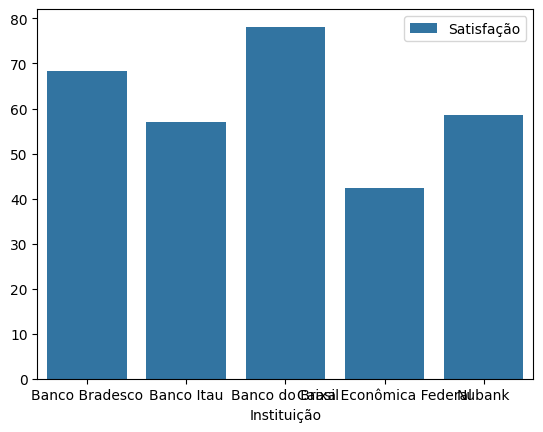

In [11]:
instituicao = df_classificacao.index
valores = df_classificacao.values


sns.barplot(x = instituicao, y = valores, label = 'Satisfação')

In [13]:
# Calcular a média de classificação por Elogio quanto ao app

df_classificacaoElogio = dados.groupby(['Elogio quanto ao app'])['Classificação'].mean()
df_classificacao

Instituição
Banco Bradesco             6823.664561
Banco Itau                 5695.402299
Banco do Brasil            7816.091954
Caixa Econômica Federal    4241.379310
Nubank                     5852.958070
Name: Classificação, dtype: float64

<Axes: xlabel='Instituição'>

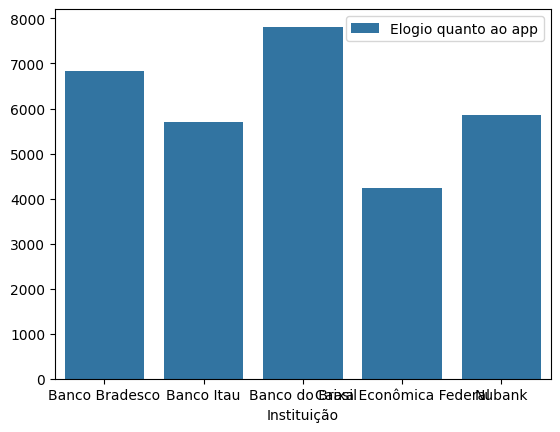

In [14]:
instituicao = df_classificacao.index
valores = df_classificacao.values


sns.barplot(x = instituicao, y = valores, label = 'Elogio quanto ao app')